# Project #1 - PHYS 7127
Part A: Due Friday, September 29, 11:59pm 
------

## A. (40 points; due Sept 29) Generating CMB power spectra and matter power spectra

### (a) What is the wavenumber ℓ of the first acoustic peak? How does this compare with the angular sizes that was calculated in Question 2(c)?

In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
H0=67.66; ombh2=0.02242; omch2=0.11933
h = H0/100
omb = ombh2/h**2
omc = omch2/h**2
omm = omb+omc

In [3]:
pars = camb.read_ini("./inifiles/params.ini")
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2)

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 1.4
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2200
 max_l_tensor = 600
 max_eta_k = 4400.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.02242
 omch2 = 0.11933
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.66
 TCMB = 2.7255
 YHe = 0.24587684703799
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.96
   nrun

In [4]:
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totalCL = powers['total']
C_TT = totalCL[:,0]
ls = np.arange(totalCL.shape[0])
kh, z, pk = results.get_matter_power_spectrum()

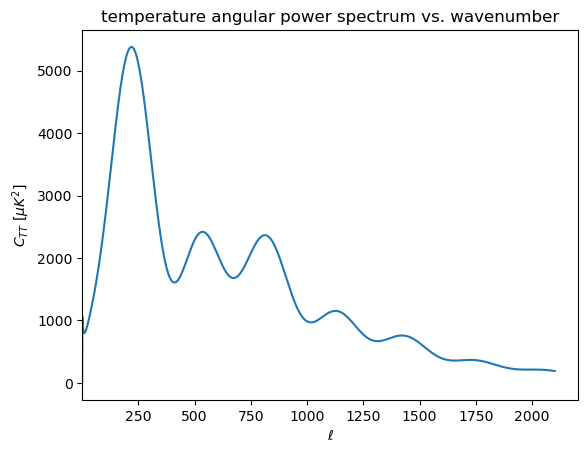

In [5]:
plt.plot(ls, C_TT)
plt.xlim(xmin=2)
plt.xlabel("$\ell$")
plt.ylabel("$C_{TT}\ [\mu K^2]$")
plt.title("temperature angular power spectrum vs. wavenumber")
plt.show()

In [6]:
l_1max = np.argmax(C_TT)
theta = np.pi/l_1max

In [7]:
print(f"The wavenumber l of the first acoustic peak is {l_1max}.")
print(f"The correspoinding angular size is {np.rad2deg(np.pi/l_1max):.2f} degree.")

The wavenumber l of the first acoustic peak is 220.
The correspoinding angular size is 0.82 degree.


Since $H_0 = 67.66$, and $\Omega_m \approx 1$ at the last scattering surface, from ProblemSet1 2(c), it can be inferred that the coresponding angular radius is around 0.8 degree. Therefore, the angular size coresponding to wavenumber 220 is pretty close to the angular sizes that was calculated in Question 2(c) of ProblemSet1.

### (b) Use CAMB to compute the CMB power spectra for the following cosmological models. Plot the $C_{TT}$ power spectra on a single plot. For each model, describe the qualitative differences between it and the Planck 2018 model and the physical reasons behind the differences.

In [12]:
low_baryon_fraction = camb.read_ini("./inifiles/params.ini")
low_omb = 0.02
low_baryon_fraction.set_cosmology(H0=H0, ombh2=low_omb*h**2, omch2=(omm-low_omb)*h**2)
low_results = camb.get_results(low_baryon_fraction)
low_powers = low_results.get_cmb_power_spectra(low_baryon_fraction, CMB_unit='muK')
low_totalCL = low_powers['total']
low_C_TT = low_totalCL[:,0]
low_ls = np.arange(low_C_TT.shape[0])
low_kh, low_z, low_pk = low_results.get_matter_power_spectrum()

In [13]:
high_baryon_fraction = camb.read_ini("./inifiles/params.ini")
high_omb = 0.1
high_baryon_fraction.set_cosmology(H0=H0, ombh2=high_omb*h**2, omch2=(omm-high_omb)*h**2)
high_results = camb.get_results(high_baryon_fraction)
high_powers = high_results.get_cmb_power_spectra(high_baryon_fraction, CMB_unit='muK')
high_totalCL = high_powers['total']
high_C_TT = high_totalCL[:,0]
high_ls = np.arange(high_C_TT.shape[0])
high_kh, high_z, high_pk = high_results.get_matter_power_spectrum()

In [14]:
open_universe_no_dark_energy = camb.read_ini("./inifiles/params.ini")
open_omlambda = 0
open_universe_no_dark_energy.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, omk=(1-omb-omc-open_omlambda))
open_results = camb.get_results(open_universe_no_dark_energy)
open_powers = open_results.get_cmb_power_spectra(open_universe_no_dark_energy, CMB_unit='muK')
open_totalCL = open_powers['total']
open_C_TT = open_totalCL[:,0]
open_ls = np.arange(open_C_TT.shape[0])
open_kh, open_z, open_pk = open_results.get_matter_power_spectrum()

In [15]:
small_matter_fraction = camb.read_ini("./inifiles/params.ini")
small_omc = 0.1
small_omk = 0
small_matter_fraction.set_cosmology(H0=H0, ombh2=ombh2, omch2=small_omc*h**2, omk=small_omk)
small_results = camb.get_results(small_matter_fraction)
small_powers = small_results.get_cmb_power_spectra(small_matter_fraction, CMB_unit='muK')
small_totalCL = small_powers['total']
small_C_TT = small_totalCL[:,0]
small_ls = np.arange(small_C_TT.shape[0])
small_kh, small_z, small_pk = small_results.get_matter_power_spectrum()

In [18]:
very_early_reionization = camb.read_ini("./inifiles/params.ini")
early_z = 30
very_early_reionization.set_cosmology(H0=H0, ombh2=ombh2, omch2=ombh2, zrei=early_z, tau=None)
early_results = camb.get_results(very_early_reionization)
early_powers = early_results.get_cmb_power_spectra(very_early_reionization, CMB_unit='muK')
early_totalCL = early_powers['total']
early_C_TT = early_totalCL[:,0]
early_ls = np.arange(early_C_TT.shape[0])
early_kh, early_z, early_pk = early_results.get_matter_power_spectrum()

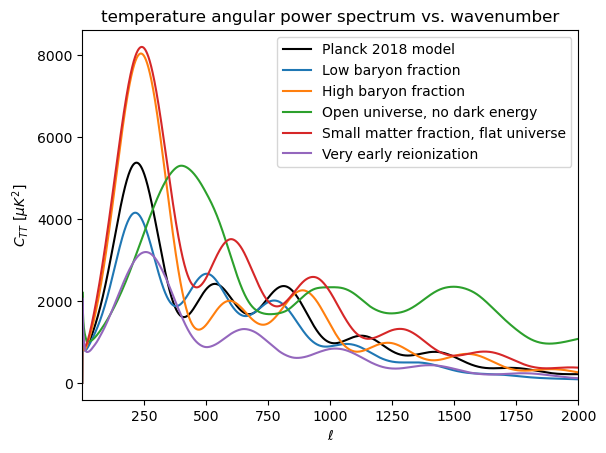

In [19]:
plt.plot(ls, C_TT, label="Planck 2018 model", c='k')
plt.plot(low_ls, low_C_TT, label="Low baryon fraction")
plt.plot(high_ls, high_C_TT, label="High baryon fraction")
plt.plot(open_ls, open_C_TT, label='Open universe, no dark energy')
plt.plot(small_ls, small_C_TT, label='Small matter fraction, flat universe')
plt.plot(early_ls, early_C_TT, label="Very early reionization")
plt.legend()
plt.xlim(xmin=2, xmax=2000)
plt.xlabel("$\ell$")
plt.ylabel("$C_{TT}\ [\mu K^2]$")
plt.title("temperature angular power spectrum vs. wavenumber")
plt.show()

**Low baryon fraction:**

In the low baryon fraction universe, dark matter becomes more dominant in the early universe's dynamics. Dark matter does not experience the same oscillations as baryonic matter, and its presence suppresses the amplitude of the acoustic peaks.

Changing the baryon fraction also affects the sound horizon at the time of recombination. The sound horizon determines the scale of the acoustic oscillations, which in turn affects the position (wavenumber) of the peaks. When you lower the baryon fraction, you effectively decrease the sound speed of the fluid and the distance it can travel before recombination. This leads to a slight shift in the wavenumber of the first peak to smaller values.

**High baryon fraction:**

As opposite to the low baryon fraction case, high baryon fraction will increase the sound speed and lead to a smaller wavenumber. Besides, since there are more baryons to oscillate, high baryon fraction increase the amplitude of the acoustic peaks.

**Open universe, no dark energy:**

The absence of dark energy in an open universe can lead to differences in the damping of acoustic oscillations, causing a suppression of the amplitude of the CMB peaks at small angular scales (l). This is because the absence of dark energy can result in a faster expansion rate and a different angular diameter distance to the last scattering surface.

The positions (wavenumbers) of the CMB peaks can also be shifted due to differences in the angular diameter distance and the evolution of perturbations. In an open universe, the positions of the peaks may be shifted to larger l values compared to a flat universe with dark energy.

**Small matter fraction, flat universe:**

With lower dark matter density, the baryonic matter has a more dominant role in shaping the CMB power spectrum. Baryonic matter has a more pronounced effect on the acoustic oscillations, and in this scenario, the peaks could be enhanced due to the increased influence of baryons.

The shift in the wavenumber of the first peak likely reflects differences in the sound horizon and the dynamics of acoustic oscillations. In the universe with lower dark matter density, the altered balance between dark matter and baryons could result in a different sound horizon and lead to a slightly shifted first peak.

**Very early reionization:**

Early reionization means that the universe became ionized at a higher redshift (z), indicating that the intergalactic medium was significantly heated and ionized much earlier in cosmic history. This process suppresses the growth of small-scale density perturbations. As a result, the first acoustic peak and small-scale fluctuations, such as those responsible for high-l CMB anisotropies, are damped or reduced.

The positions (wavenumbers) of the CMB peaks can also be affected by the damping of fluctuations. The damping process can lead to a shift in the peak positions to larger l values.

### (c) Go crazy and create an alternative universe, e.g. massive neutrinos, no ionization, nearly dominated by dark energy, or a closed universe. If CAMB crashes, don’t panic and determine which parameter(s) are too extreme and retry the experiment. Compare your alternative universe with the standard cosmological model (part a) by plotting their TT power spectra in one plot.

In [20]:
no_ionization_universe = camb.read_ini("./inifiles/params.ini")
no_ioni_z = 0
no_ionization_universe.set_cosmology(H0=H0, ombh2=ombh2, omch2=ombh2, zrei=no_ioni_z, tau=None, )
no_ioni_results = camb.get_results(no_ionization_universe)
no_ioni_powers = no_ioni_results.get_cmb_power_spectra(no_ionization_universe, CMB_unit='muK')
no_ioni_totalCL = no_ioni_powers['total']
no_ioni_C_TT = no_ioni_totalCL[:,0]
no_ioni_ls = np.arange(no_ioni_C_TT.shape[0])
no_ioni_kh, no_ioni_z, no_ioni_pk = no_ioni_results.get_matter_power_spectrum()

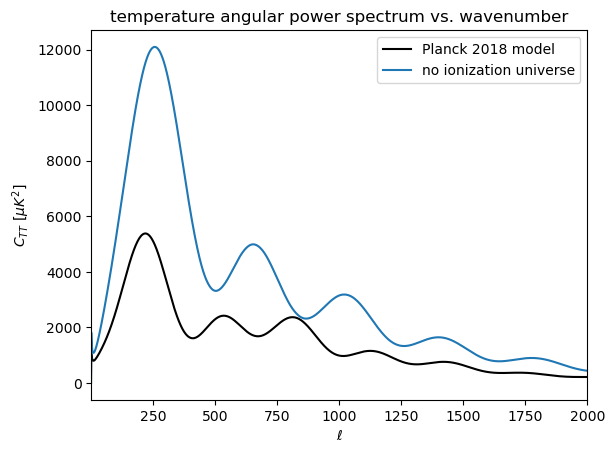

In [21]:
plt.plot(ls, C_TT, label="Planck 2018 model", c='k')
plt.plot(no_ioni_ls, no_ioni_C_TT, label="no ionization universe")
plt.legend()
plt.xlim(xmin=2, xmax=2000)
plt.xlabel("$\ell$")
plt.ylabel("$C_{TT}\ [\mu K^2]$")
plt.title("temperature angular power spectrum vs. wavenumber")
plt.show()

Without ionization, the baryonic acoustic oscillations (BAO) in the early universe, responsible for the acoustic peaks, will be less damped. This results in sharper and more pronounced peaks in the CMB power spectrum. The first acoustic peak, in particular, will be well-defined and have a higher contrast.

The position (wavenumber) of the first acoustic peak is closely related to the sound horizon at the time of recombination. In a universe with no ionization, the altered expansion history can lead to a different sound horizon. A larger sound horizon would result in a higher peak position in the CMB power spectrum.

### (d) CAMB also calculates the matter power spectrum (if get transfer = T), among many other quantities. As discussed in class, this describes how clustered matter is at recombination. In one plot, show the matter spectra that were calculated for each of the cosmological models in parts (b) and (c). You will need these results for the next part.

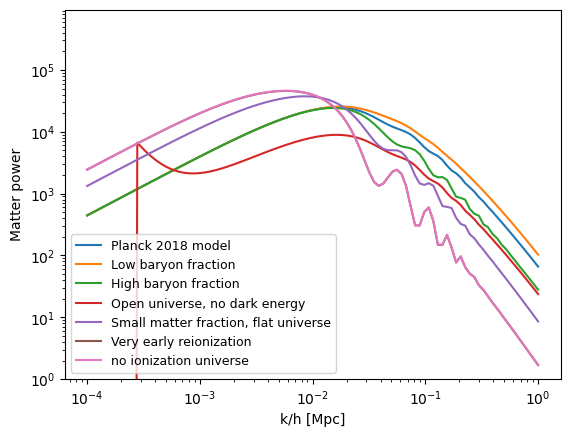

In [22]:
plt.loglog(kh, pk[0,:], label="Planck 2018 model")
plt.loglog(low_kh, low_pk[0,:], label="Low baryon fraction")
plt.loglog(high_kh, high_pk[0,:], label="High baryon fraction")
plt.loglog(open_kh, open_pk[0,:], label="Open universe, no dark energy")
plt.loglog(small_kh, small_pk[0,:], label="Small matter fraction, flat universe")
plt.loglog(early_kh, early_pk[0,:], label="Very early reionization")
plt.loglog(no_ioni_kh, no_ioni_pk[0,:], label="no ionization universe")
plt.legend(fontsize="9")
plt.xlabel("k/h [Mpc]")
plt.ylabel("Matter power")
plt.ylim(ymin=1)
plt.show()